In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge
import xgboost as xgb
from xgboost import XGBRegressor
import pickle
from sklearn.linear_model import Lasso
import lightgbm as lgb


# Cargar datos

In [103]:
df = pd.read_csv('C:/Users/ASUS/Desktop/workshop3ETL/data/df_combined.csv')

# 1. Vista previa

In [104]:
df

,id,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Year,Lower_Confidence_Interval,Upper_Confidence_Interval,Whisker_High,Whisker_Low
0,1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,2,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,3,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,4,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,5,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,778,Rwanda,NaN,152,3.334,NaN,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,2019,NaN,NaN,NaN,NaN
778,779,Tanzania,NaN,153,3.231,NaN,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,2019,NaN,NaN,NaN,NaN
779,780,Afghanistan,NaN,154,3.203,NaN,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,2019,NaN,NaN,NaN,NaN
780,781,Central African Republic,NaN,155,3.083,NaN,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,2019,NaN,NaN,NaN,NaN


# 2. Estadísticas descriptivas generales

In [105]:
df.describe(include='all')

,id,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Year,Lower_Confidence_Interval,Upper_Confidence_Interval,Whisker_High,Whisker_Low
count,782.000000,782,315,782.000000,782.000000,158.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,470.000000,782.000000,157.000000,157.000000,155.000000,155.000000
unique,NaN,170,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Switzerland,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,391.500000,NaN,NaN,78.698210,5.379018,0.047885,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2.092717,2016.993606,5.282395,5.481975,5.452326,5.255713
std,225.888247,NaN,NaN,45.182384,1.127456,0.017146,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,0.565772,1.417364,1.148043,1.136493,1.118542,1.145030
min,1.000000,NaN,NaN,1.000000,2.693000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000,2.732000,3.078000,2.864884,2.521116
25%,196.250000,NaN,NaN,40.000000,4.509750,0.037268,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,1.737975,2016.000000,4.327000,4.465000,4.608172,4.374955
50%,391.500000,NaN,NaN,79.000000,5.322000,0.043940,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2.094640,2017.000000,5.237000,5.419000,5.370032,5.193152
75%,586.750000,NaN,NaN,118.000000,6.189500,0.052300,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2.455575,2018.000000,6.154000,6.434000,6.194600,6.006527


# 3. Valores faltantes

In [106]:
print("\nValores faltantes por columna:")
missing = df.isnull().sum().sort_values(ascending=False)
display(missing.to_frame(name='MissingCount'))


Valores faltantes por columna:


,MissingCount
Whisker_High,627
Whisker_Low,627
Upper_Confidence_Interval,625
Lower_Confidence_Interval,625
Standard_Error,624
Region,467
Dystopia_Residual,312
Corruption_Perception,1
Country,0
id,0


# 4. Distribución de Happiness Score

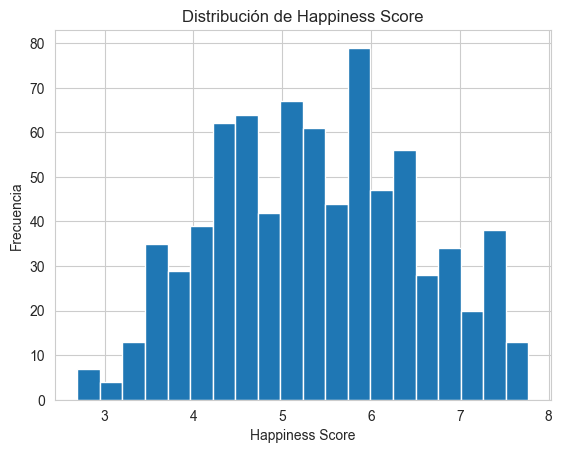

In [107]:
plt.figure()
df['Happiness_Score'].hist(bins=20)
plt.title('Distribución de Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frecuencia')
plt.show()

# 5. Boxplot de Happiness Score por Región

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11380\2825860707.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_region, labels=regions, vert=True)


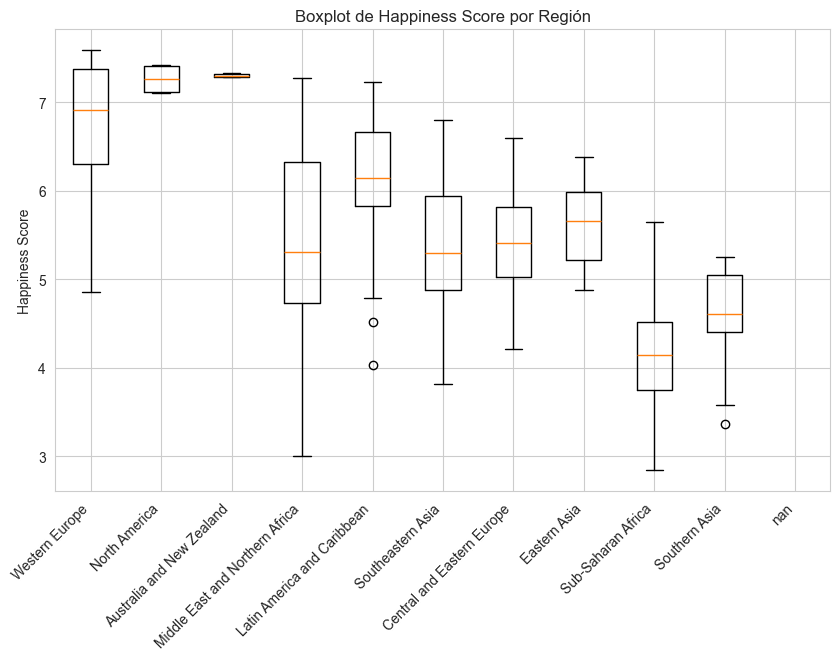

In [108]:
plt.figure(figsize=(10,6))
regions = df['Region'].unique()
data_by_region = [df[df['Region']==r]['Happiness_Score'] for r in regions]
plt.boxplot(data_by_region, labels=regions, vert=True)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot de Happiness Score por Región')
plt.ylabel('Happiness Score')
plt.show()

# 6. Tendencia temporal media y por región

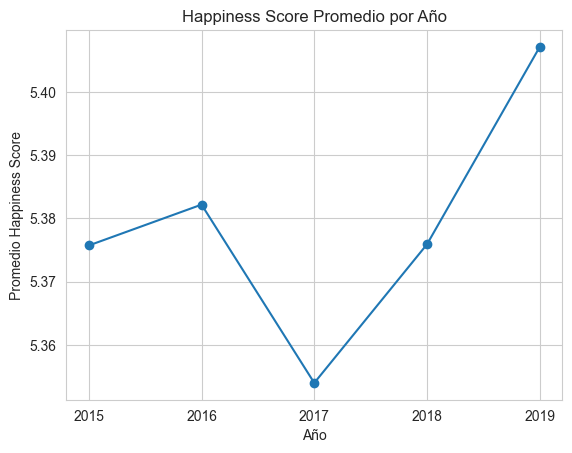

In [ ]:
avg_by_year = df.groupby('Year')['Happiness_Score'].mean().reset_index()
plt.figure()
plt.plot(avg_by_year['Year'], avg_by_year['Happiness_Score'], marker='o')
plt.title('Happiness Score Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Promedio Happiness Score')
plt.xticks(avg_by_year['Year'].unique())
plt.show()

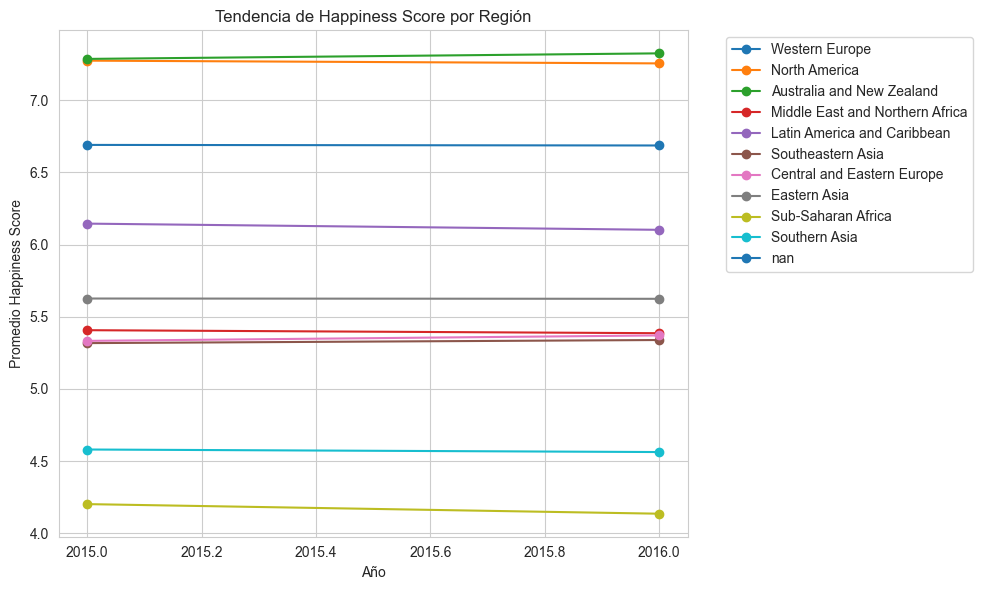

In [110]:
plt.figure(figsize=(10,6))
for region in regions:
    sub = df[df['Region']==region].groupby('Year')['Happiness_Score'].mean()
    plt.plot(sub.index, sub.values, marker='o', label=region)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('Tendencia de Happiness Score por Región')
plt.xlabel('Año')
plt.ylabel('Promedio Happiness Score')
plt.tight_layout()
plt.show()

Eliminar columnas con >50% de valores faltantes

In [ ]:
# Lista de columnas con % de missing mayor al umbral (p.ej. 50%)
threshold = 0.5
missing_frac = df.isnull().mean()
cols_to_drop = missing_frac[missing_frac > threshold].index.tolist()


cols_to_drop = [
    'Whisker_High','Whisker_Low',
    'Upper_Confidence_Interval','Lower_Confidence_Interval',
    'Standard_Error','Dystopia_Residual'
]
df = df.drop(columns=cols_to_drop)


In [112]:
print("\nValores faltantes por columna:")
missing = df.isnull().sum().sort_values(ascending=False)
display(missing.to_frame(name='MissingCount'))


Valores faltantes por columna:


,MissingCount
Region,467
Corruption_Perception,1
Country,0
id,0
Happiness_Rank,0
Happiness_Score,0
Social_Support,0
GDP_per_Capita,0
Life_Expectancy,0
Freedom,0


Tratar los missing restantes: imputamos con la moda global y rellenamos con la mediana(en corrupcion)

In [113]:
df['Region'].fillna(df['Region'].mode()[0], inplace=True)

df['Corruption_Perception'].fillna(df['Corruption_Perception'].median(), inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11380\2927395341.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region'].fillna(df['Region'].mode()[0], inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11380\2927395341.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Revisar que no queden más NAs

In [114]:
print("\nValores faltantes por columna:")
missing = df.isnull().sum().sort_values(ascending=False)
display(missing.to_frame(name='MissingCount'))


Valores faltantes por columna:


,MissingCount
id,0
Country,0
Region,0
Happiness_Rank,0
Happiness_Score,0
GDP_per_Capita,0
Social_Support,0
Life_Expectancy,0
Freedom,0
Corruption_Perception,0


distribucion variables numericas

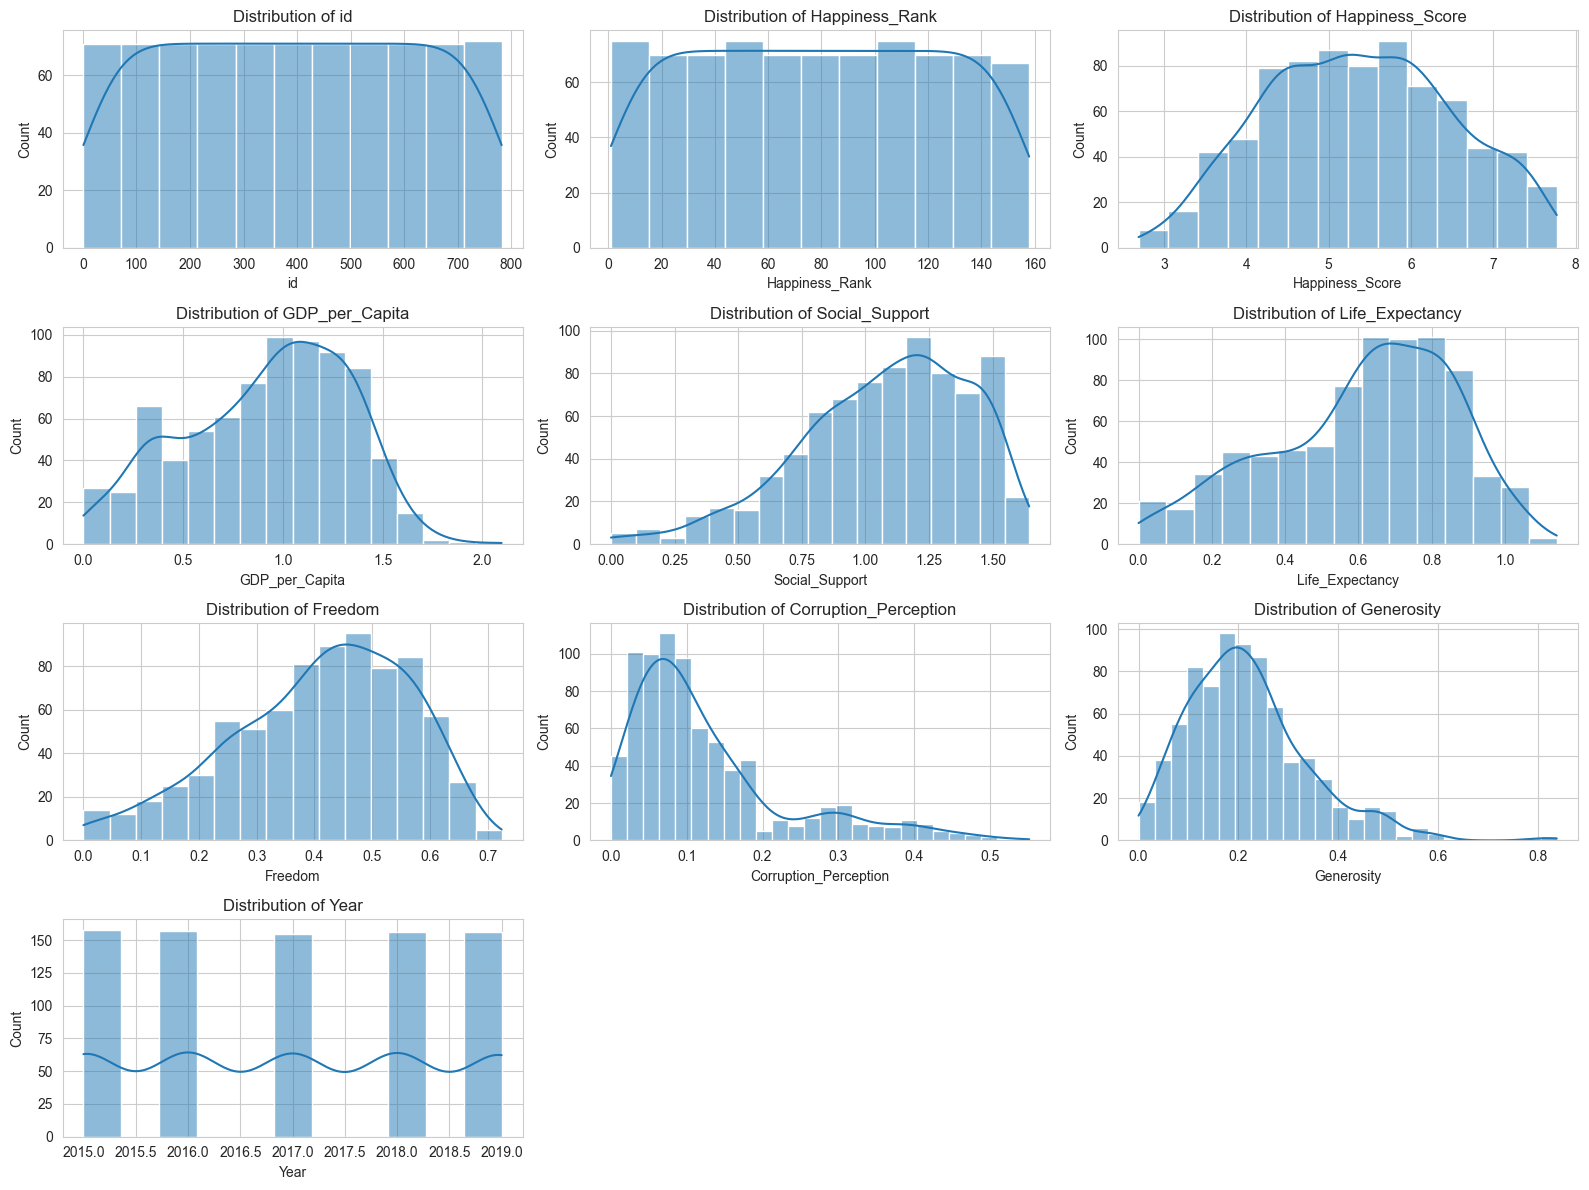

In [115]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


distribucion variables categoricas

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11380\1745438112.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette='viridis')


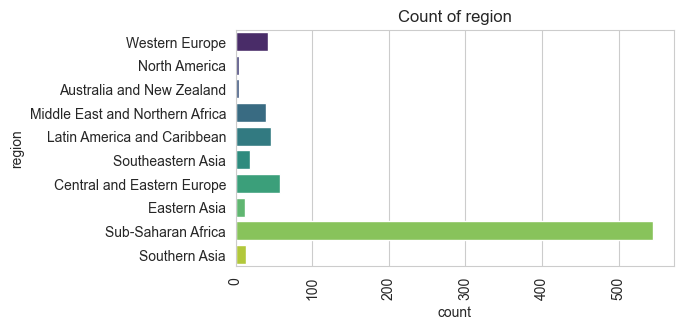

In [152]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'Country']

plt.figure(figsize=(16, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(df[column], palette='viridis')
    plt.title(f'Count of {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

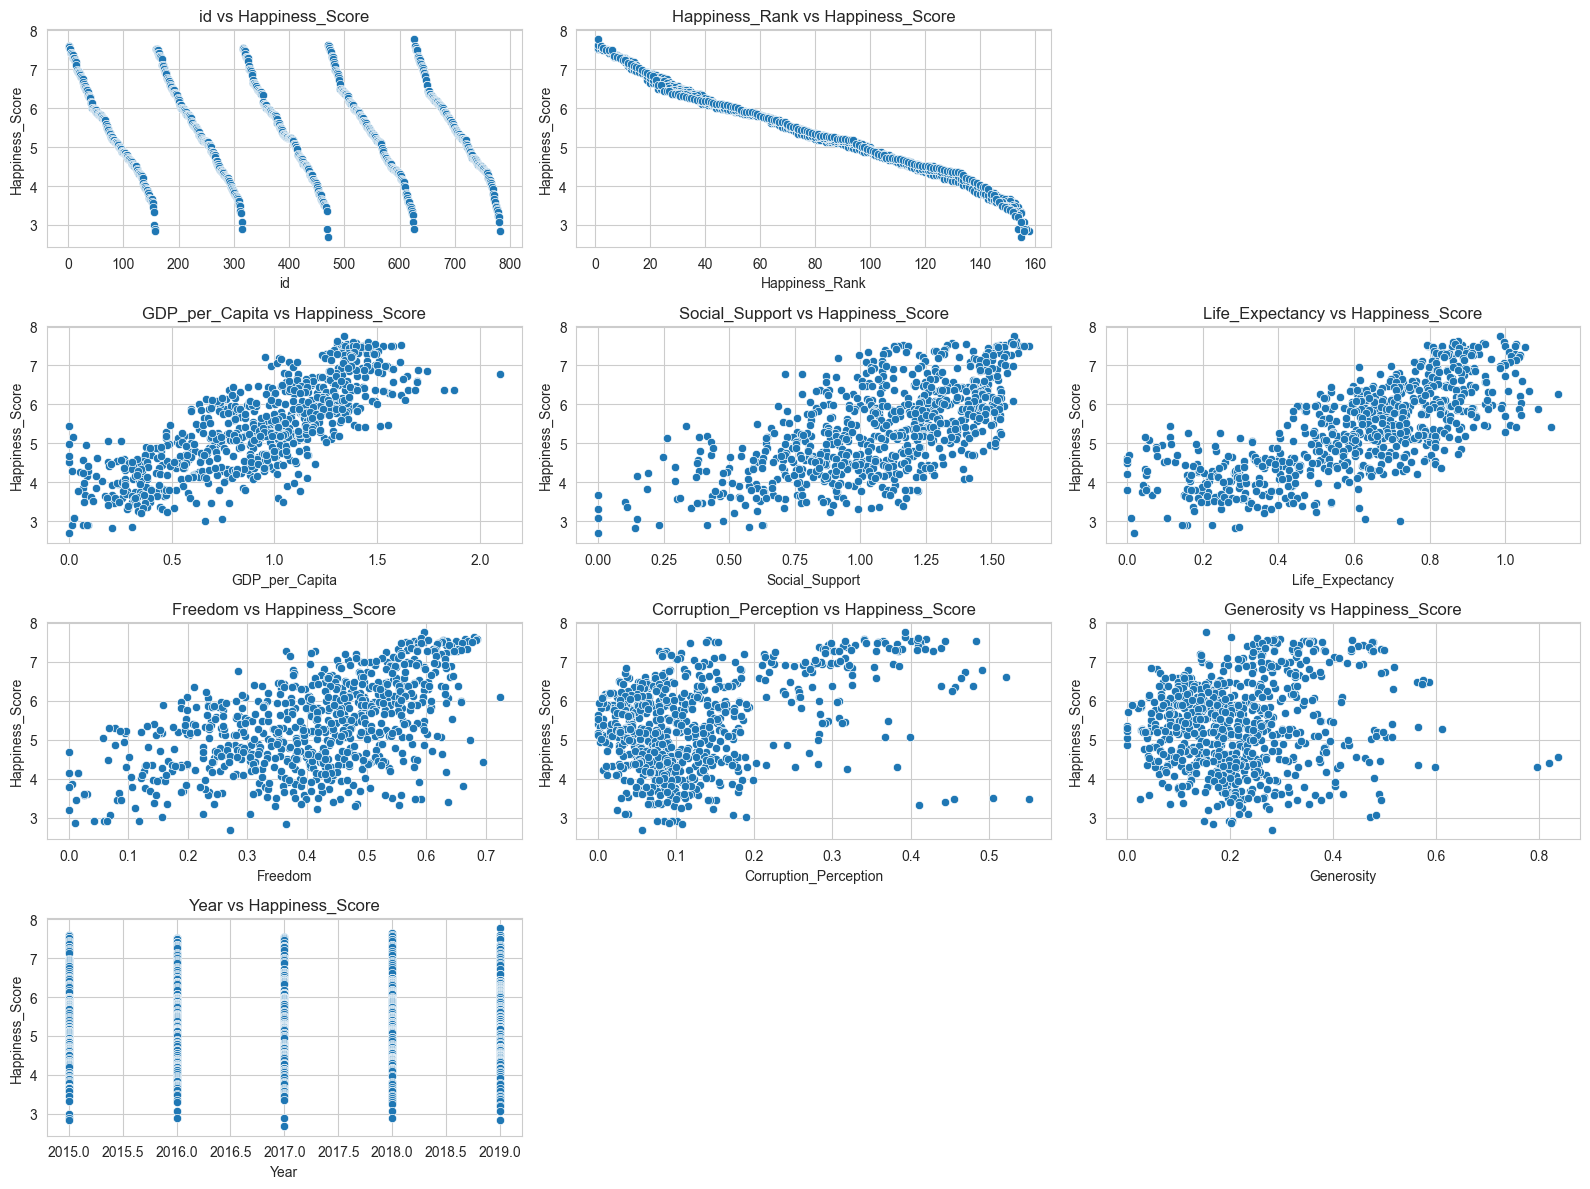

In [117]:
target = 'Happiness_Score'

plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    if column != target:
        plt.subplot(4, 3, i)
        sns.scatterplot(x=df[column], y=df[target])
        plt.title(f'{column} vs {target}')
plt.tight_layout()
plt.show()

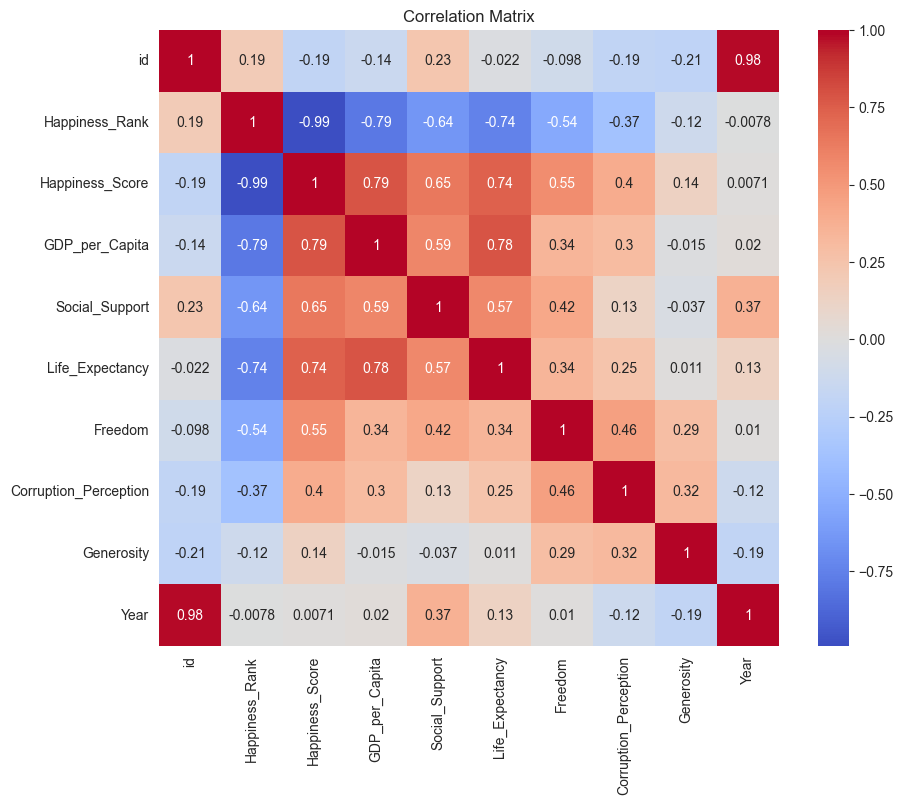

In [118]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Eso eliminar del entrenamiento todas las columnas derivadas del target (Standard_Error, Lower_/Upper_Confidence_Interval, Whisker_High, Whisker_Low, Dystopia_Residual)

pero las vamos a conservar para reportes de calidad


eso para tener un modelo que aprende de causas (factores socioeconómicos) y luego un mecanismo separado que comprueba si las predicciones son «lo suficientemente precisas» según el margen de error original. Así evitamos data leakage y mantenemos la integridad predictiva

# ENTRENAR MODELOS

One-hot para Region

In [ ]:
df = pd.get_dummies(df, columns=['Country'], drop_first=True)


Limpieza de nombres de columnas

In [120]:
df.columns = (
    df.columns
    .str.replace(' ', '_', regex=False)
    .str.replace('-', '_', regex=False)
    .str.replace('&', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
    .str.lower()
)

Eliminar columnas duplicadas

In [121]:
df = df.loc[:, ~df.columns.duplicated()]

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Columns: 179 entries, id to country_zimbabwe
dtypes: bool(168), float64(7), int64(3), object(1)
memory usage: 195.6+ KB


In [123]:
df

,id,region,happiness_rank,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,corruption_perception,generosity,...,country_united_arab_emirates,country_united_kingdom,country_united_states,country_uruguay,country_uzbekistan,country_venezuela,country_vietnam,country_yemen,country_zambia,country_zimbabwe
0,1,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,False,False,False,False,False,False,False,False,False,False
1,2,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,False,False,False,False,False,False,False,False,False,False
2,3,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,False,False,False,False,False,False,False,False,False,False
3,4,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,False,False,False,False,False,False,False,False,False,False
4,5,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,778,Sub-Saharan Africa,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,...,False,False,False,False,False,False,False,False,False,False
778,779,Sub-Saharan Africa,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,...,False,False,False,False,False,False,False,False,False,False
779,780,Sub-Saharan Africa,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,...,False,False,False,False,False,False,False,False,False,False
780,781,Sub-Saharan Africa,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,...,False,False,False,False,False,False,False,False,False,False


## Escalado de features numéricas
Para que el modelo trate por igual GDP, Soporte Social, etc.:

In [124]:
scaler = StandardScaler()
num_cols = ['gdp_per_capita','social_support','life_expectancy',
            'freedom','generosity', 'corruption_perception']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Columns: 179 entries, id to country_zimbabwe
dtypes: bool(168), float64(7), int64(3), object(1)
memory usage: 195.6+ KB


In [ ]:
ruta = 'C:/Users/ASUS/Desktop/workshop3ETL/models/df_clean.csv'
df.to_csv(ruta, index=False) 


In [127]:
df_ran = pd.read_csv('C:/Users/ASUS/Desktop/workshop3ETL/models/df_clean.csv')
df_ran

,id,region,happiness_rank,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,corruption_perception,generosity,...,country_united_arab_emirates,country_united_kingdom,country_united_states,country_uruguay,country_uzbekistan,country_venezuela,country_vietnam,country_yemen,country_zambia,country_zimbabwe
0,1,Western Europe,1,7.587,1.180267,0.823221,1.325870,1.665629,2.785442,0.639746,...,False,False,False,False,False,False,False,False,False,False
1,2,Western Europe,2,7.561,0.948887,0.983300,1.351701,1.424764,0.151941,1.781084,...,False,False,False,False,False,False,False,False,False,False
2,3,Western Europe,3,7.527,1.005780,0.856834,1.056718,1.559661,3.389010,1.004676,...,False,False,False,False,False,False,False,False,False,False
3,4,Western Europe,4,7.522,1.333775,0.766865,1.099313,1.692857,2.267409,1.050487,...,False,False,False,False,False,False,False,False,False,False
4,5,North America,5,7.427,1.007770,0.741542,1.181602,1.452254,1.931894,1.959500,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,778,Sub-Saharan Africa,152,3.334,-1.368399,-1.115550,0.006385,0.941921,2.702368,-0.012891,...,False,False,False,False,False,False,False,False,False,False
778,779,Sub-Saharan Africa,153,3.231,-1.080986,-0.587217,-0.457045,0.038677,0.204454,0.469756,...,False,False,False,False,False,False,False,False,False,False
779,780,Sub-Saharan Africa,154,3.203,-1.390508,-1.704611,-1.013160,-2.690691,-0.949884,-0.495538,...,False,False,False,False,False,False,False,False,False,False
780,781,Sub-Saharan Africa,155,3.083,-2.186421,-3.274429,-2.044795,-1.218010,-0.855266,0.134357,...,False,False,False,False,False,False,False,False,False,False


División train/test

In [ ]:
X = df_ran.drop(columns=['happiness_score','region','id','happiness_rank','year'])
y = df_ran['happiness_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest Regressor

In [129]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predicciones
y_pred_rf = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_gradient_boosting = mean_absolute_error(y_test, y_pred_rf)

print(f"MAE(Random Forest): {mae_gradient_boosting:.4f}")
print("RMSE(Random Forest):", rmse)
print("R²(Random Forest):", r2_score(y_test, y_pred_rf))


MAE(Random Forest): 0.3510
RMSE(Random Forest): 0.45444146034491223
R²(Random Forest): 0.8302197147330387


Se realiza una validación cruzada del modelo seleccionado para evaluar su capacidad de generalización

In [ ]:
y_pred_cv = cross_val_predict(rf_model, X, y, cv=5)


print("MAE con cross_val_predict:", mean_absolute_error(y, y_pred_cv))
print("RMSE con cross_val_predict:", np.sqrt(mean_squared_error(y, y_pred_cv)))
print("R² con cross_val_predict:", r2_score(y, y_pred_cv))


MAE con cross_val_predict: 0.36473365469414293
RMSE con cross_val_predict: 0.47162076827572813
R² con cross_val_predict: 0.8247968124417602


Nota: el modelo ha visto el 80% de los datos (entrenamiento) y se evalúa solo en el 20% limpio (por eso en el croos valiation disminuye)

### Visualizar: valores reales vs. predichos (Random Forest)

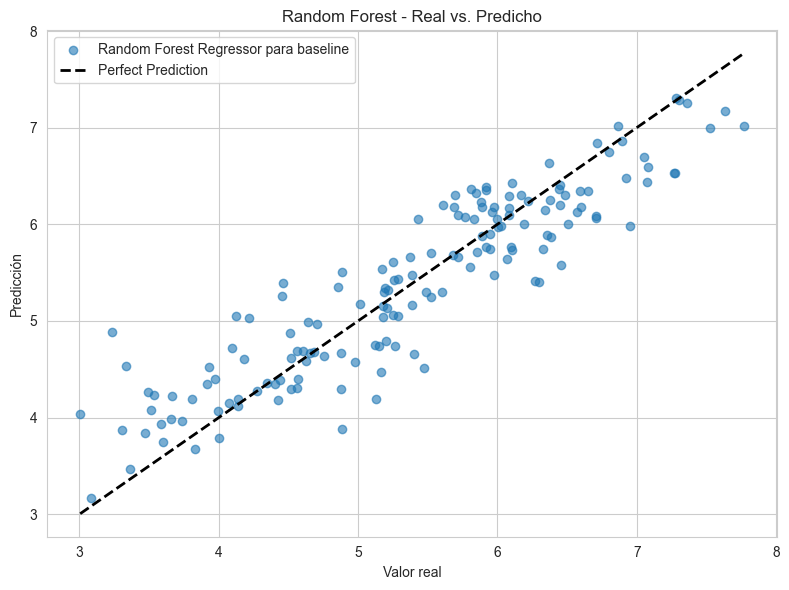

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest Regressor para baseline')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Random Forest - Real vs. Predicho")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

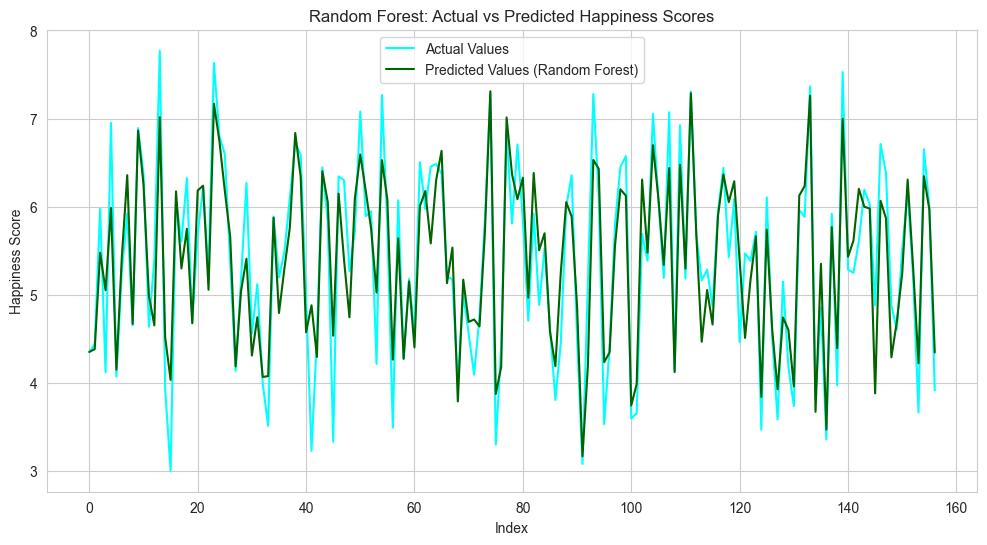

In [132]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_test)), y_test, label='Actual Values', color='cyan', linestyle='-')
plt.plot(range(len(y_test)), y_pred_rf, label='Predicted Values (Random Forest)', color='darkgreen', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.title('Random Forest: Actual vs Predicted Happiness Scores')
plt.legend()
plt.show()

# XGBOOST

In [ ]:
target_col = 'happiness_score'
drop_cols = [target_col, 'id', 'region', 'happiness_rank', 'year']
X = df.drop(columns=drop_cols)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Prepara DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_XG = model.predict(dtest)

mse = mean_squared_error(y_test, y_pred_XG)
r2  = r2_score(y_test, y_pred_XG)
mae_gradient = mean_absolute_error(y_test, y_pred_XG)

print(f"MSE(XGBoost): {mse:.4f}, R²(XGBoost): {r2:.4f} , MAE(XGBoost): {mae_gradient:.4f}")


MSE(XGBoost): 0.1570, R²(XGBoost): 0.8709 , MAE(XGBoost): 0.3094


Visualizar: valores reales vs. predichos (XGBoost)

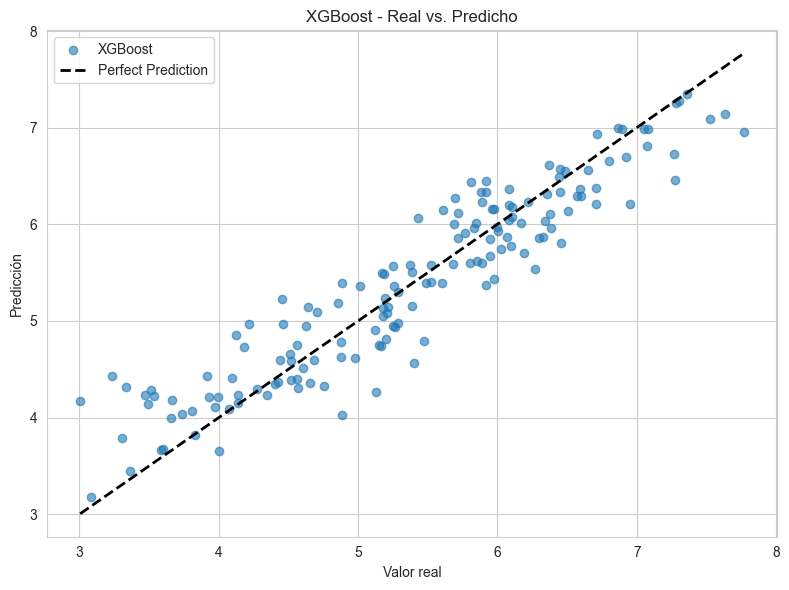

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_XG, alpha=0.6, label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("XGBoost - Real vs. Predicho")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Gráfico de residuos (XGBoost)

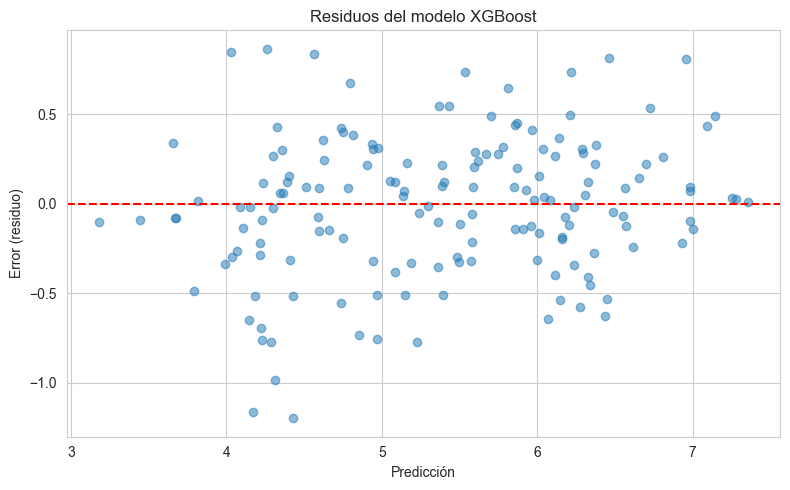

In [135]:
residuos = y_test - y_pred_XG

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_XG, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicción")
plt.ylabel("Error (residuo)")
plt.title("Residuos del modelo XGBoost")
plt.grid(True)
plt.tight_layout()
plt.show()


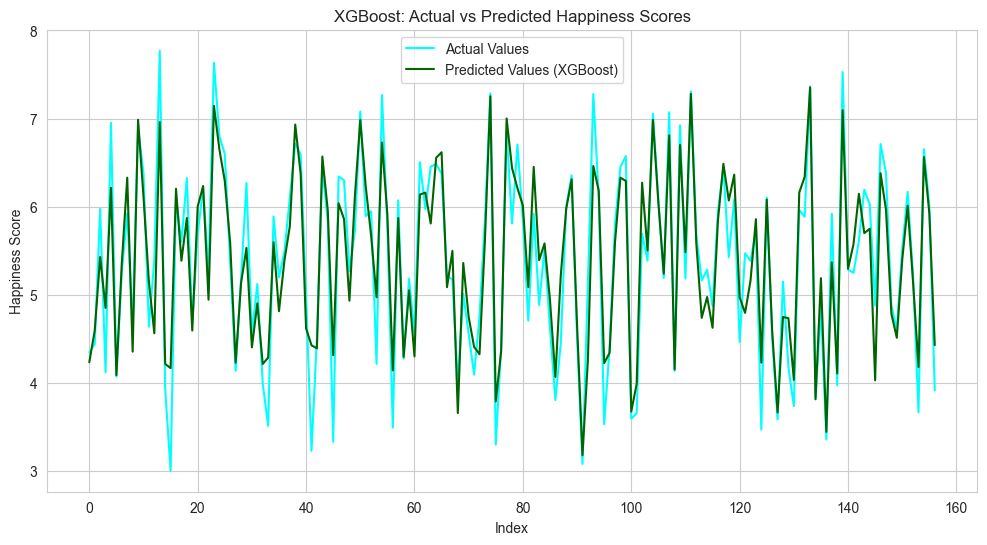

In [137]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_test)), y_test, label='Actual Values', color='cyan', linestyle='-')
plt.plot(range(len(y_test)), y_pred_XG, label='Predicted Values (XGBoost)', color='darkgreen', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.title('XGBoost: Actual vs Predicted Happiness Scores')
plt.legend()
plt.show()

# LightGBM

In [ ]:
# Limpia los nombres de las columnas para que sean compatibles
X.columns = X.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1,
    'seed': 42
}

model = lgb.train(params, lgb_train, num_boost_round=300)

y_pred_lgb = model.predict(X_test)

rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)

print(f"LightGBM - RMSE: {rmse_lgb:.4f}, R²: {r2_lgb:.4f}, MAE: {mae_lgb:.4f}")


LightGBM - RMSE: 0.5185, R²: 0.7790, MAE: 0.4145


# Lasso

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"MAE (Lasso): {mae_lasso:.4f}")
print(f"RMSE (Lasso): {rmse_lasso:.4f}")
print("R² (Lasso):", r2_score(y_test, y_pred_lasso))


MAE (Lasso): 0.4597
RMSE (Lasso): 0.5858
R² (Lasso): 0.717879684574962


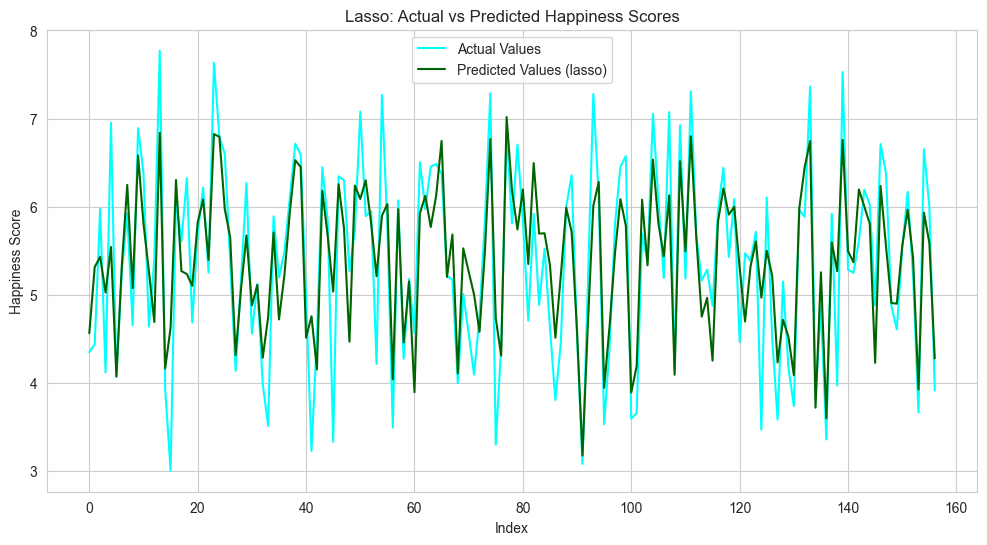

In [140]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_test)), y_test, label='Actual Values', color='cyan', linestyle='-')
plt.plot(range(len(y_test)), y_pred_lasso, label='Predicted Values (lasso)', color='darkgreen', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.title('Lasso: Actual vs Predicted Happiness Scores')
plt.legend()
plt.show()

# Ridge

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"MAE (Ridge): {mae_ridge:.4f}")
print(f"RMSE (Ridge): {rmse_ridge:.4f}")
print("R² (Ridge):", r2_score(y_test, y_pred_ridge))


MAE (Ridge): 0.2432
RMSE (Ridge): 0.3159
R² (Ridge): 0.9179452290332342


In [ ]:
y_pred_cv = cross_val_predict(ridge_model, X, y, cv=5)

print("MAE con cross_val_predict:", mean_absolute_error(y, y_pred_cv))
print("RMSE con cross_val_predict:", np.sqrt(mean_squared_error(y, y_pred_cv)))
print("R² con cross_val_predict:", r2_score(y, y_pred_cv))

MAE con cross_val_predict: 0.25121475679923916
RMSE con cross_val_predict: 0.32975939370566126
R² con cross_val_predict: 0.9143454353079353


In [ ]:
with open('C:/Users/ASUS/Desktop/workshop3ETL/models/ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)


In [ ]:
columnas = X.columns.tolist()

df_columnas = pd.DataFrame(columnas, columns=["feature"])
df_columnas.to_csv("C:/Users/ASUS/Desktop/workshop3ETL/models/features_selection.csv", index=False)

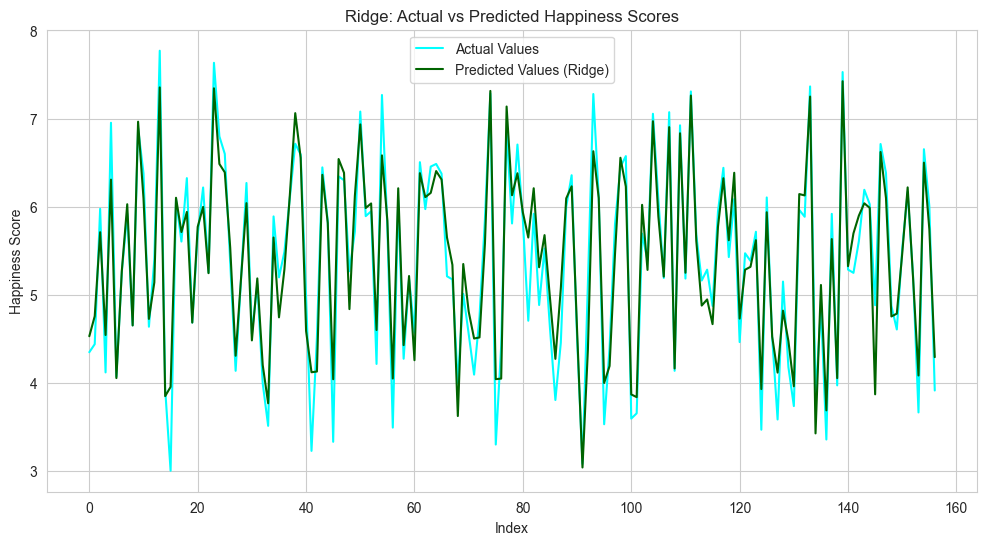

In [145]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_test)), y_test, label='Actual Values', color='cyan', linestyle='-')
plt.plot(range(len(y_test)), y_pred_ridge, label='Predicted Values (Ridge)', color='darkgreen', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.title('Ridge: Actual vs Predicted Happiness Scores')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Ridge Regression')

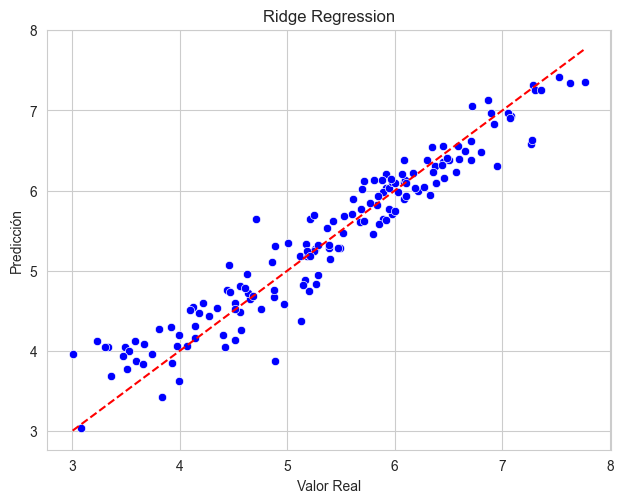

In [ ]:
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")

plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_ridge, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Ridge Regression")

# Comparar los Modelos

In [ ]:
modelos = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(
        objective='reg:squarederror',
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        n_estimators=100,
        seed=42
    ),
    "lightgbm": LGBMRegressor(
        objective= 'regression',
        learning_rate= 0.05,
        num_leaves= 31,
        verbose= -1,
        seed= 42
    )
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    
    mae = mean_absolute_error(y_test, predicciones)
    rmse = np.sqrt(mean_squared_error(y_test, predicciones))
    r2 = r2_score(y_test, predicciones)
    
    resultados.append({
        "Modelo": nombre,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

tabla_resultados = pd.DataFrame(resultados)
print(tabla_resultados.sort_values(by="R²", ascending=False))


          Modelo       MAE      RMSE        R²
0          Ridge  0.243188  0.315927  0.917945
3        XGBoost  0.309364  0.396228  0.870931
2  Random Forest  0.350952  0.454441  0.830220
4       lightgbm  0.409087  0.519349  0.778257
1          Lasso  0.459663  0.585803  0.717880


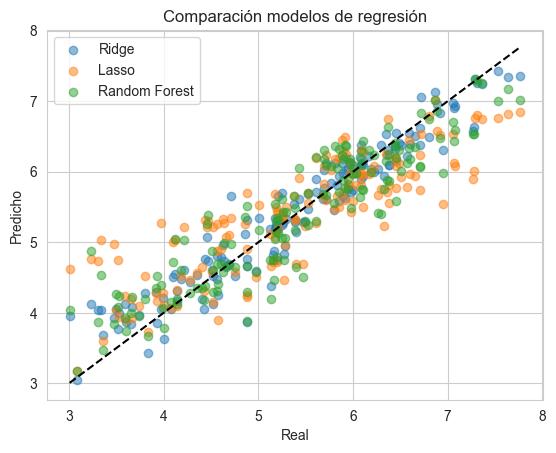

In [ ]:
plt.scatter(y_test, y_pred_ridge, label='Ridge', alpha=0.5)
plt.scatter(y_test, y_pred_lasso, label='Lasso', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # línea ideal
plt.xlabel('Real')
plt.ylabel('Predicho')
plt.legend()
plt.title("Comparación modelos de regresión")
plt.show()


Validación cruzada: Ridge

In [ ]:
ridge = Ridge(alpha=1.0)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores_ridge = cross_val_score(ridge, X, y, cv=5, scoring='r2')

print("Ridge R² por fold:", scores_ridge)
print("Ridge R² promedio:", scores_ridge.mean())

Ridge R² por fold: [0.88979166 0.88930413 0.9349069  0.94961193 0.90879702]
Ridge R² promedio: 0.9144823279770937


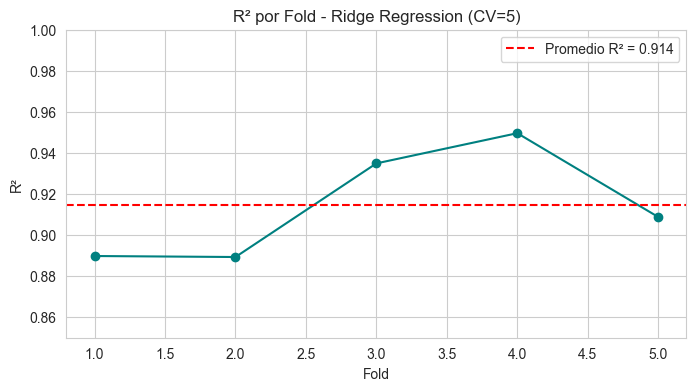

In [ ]:
scores_ridge = [0.88979166, 0.88930413, 0.9349069, 0.94961193, 0.90879702]

plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), scores_ridge, marker='o', linestyle='-', color='teal')
plt.title('R² por Fold - Ridge Regression (CV=5)')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.ylim(0.85, 1)
plt.grid(True)
plt.axhline(np.mean(scores_ridge), color='red', linestyle='--', label=f'Promedio R² = {np.mean(scores_ridge):.3f}')
plt.legend()
plt.show()


# Feature Selection

Filtrar features importantes

In [ ]:
feature_names = X.columns

importances = rf_model.feature_importances_

rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

rf_importance_df

,Feature,Importance
0,gdp_per_capita,0.509599
2,life_expectancy,0.199211
3,freedom,0.104177
1,social_support,0.053106
4,corruption_perception,0.033386
...,...,...
44,country_djibouti,0.000010
54,country_gambia,0.000007
114,country_north_macedonia,0.000005
147,country_swaziland,0.000005
